In [106]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 18-11-26 下午3:58
# @Author  : Leon
# @Site    : 
# @File    : profit.py
# @Software: PyCharm

import numpy as np
import matplotlib.pyplot as plt
import xlrd
from datetime import datetime
import matplotlib.dates as mdates

import tushare  as ts
import pandas as pd


def create_figure(data):
    x_index = []
    hui_net_value = []
    fang_net_value = []
    hs_300 = []
    plt.figure(figsize=(8,6))
    for d in data:
        x_index.append(d[0])
        hui_net_value.append(d[1])
        fang_net_value.append(d[2])
        hs_300.append(d[3])

        plt.scatter(d[0],d[1],s=10,color='r')
        plt.scatter(d[0], d[2],s=10, color='b')
        plt.scatter(d[0], d[3], s=10, color='y')

        plt.annotate(str(round(d[1],3)), xy=(d[0], d[1]), xytext=(0, 0), textcoords='offset points', fontsize=12)
        plt.annotate(str(round(d[2],3)), xy=(d[0], d[2]), xytext=(0, 0), textcoords='offset points', fontsize=12)
        plt.annotate(str(round(d[3],3)), xy=(d[0], d[3]), xytext=(0, 0), textcoords='offset points', fontsize=12)

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    print(x_index)
    plt.gca().set_xlim(x_index[0], x_index[-1])
    #print(plt.xlim().date())
    L1, = plt.plot(x_index, hui_net_value, color='B', linewidth=1.0, linestyle='-')
    #L2, = plt.plot(x_index, fang_net_value, color='blue', linewidth=1.0, linestyle='-')
    L3, = plt.plot(x_index, hs_300, color='R', linewidth=1.0, linestyle='-')

    #plt.legend([L1, L2,L3], ['Leon', 'FANG','HS_300'], loc='upper right')
    plt.legend([L1,L3], ['Leon','HS_300'], loc='left right')
    plt.gcf().autofmt_xdate()
    #plt.gcf().figure(figsize=(1200,900))
    plt.savefig('he.jpg')
    #plt.show()

In [100]:
if __name__ == '__main__':
    #create_figure(data,index)
    file = xlrd.open_workbook('pk.xlsx')
    table = file.sheet_by_name('Sheet1')
    nrows = table.nrows
    ncols = table.ncols
    print(nrows,ncols)
    #tp = xlrd.xldate_as_tuple(table.cell(1,0).value,0)
    dt = xlrd.xldate_as_datetime(table.cell(1, 0).value, 0)
    #print(tp)
    print(dt)


    

15 3
2020-03-31 00:00:00


In [101]:
dateList = []
dataList = []
df_hs300 = ts.get_hist_data('hs300', start='2020-03-31', end='2020-04-20')
# print(type(df))
#print(df_hs300)

In [102]:
d_hs300 = df_hs300.close.tolist()

In [103]:
#print(type(d_hs300))
print(d_hs300)
d_hs300.reverse()
print('after:',d_hs300)
print("len:",len(d_hs300))

[3853.46, 3839.49, 3802.38, 3797.36, 3825.7, 3753.26, 3769.18, 3792.81, 3780.34, 3798.02, 3713.22, 3734.53, 3675.08, 3686.16]
after: [3686.16, 3675.08, 3734.53, 3713.22, 3798.02, 3780.34, 3792.81, 3769.18, 3753.26, 3825.7, 3797.36, 3802.38, 3839.49, 3853.46]
len: 14


In [104]:
for i in range(1,nrows):
    date_tmp =xlrd.xldate_as_datetime(table.cell(i, 0).value, 0).date()
    #print(date_tmp)
    dateList.append(date_tmp)
    rows = table.row_values(i)
    #print(rows)
    dataList.append([rows[1],rows[2],d_hs300[i-1]])

base value: [587896.39, 587896.39, 3686.16]
[datetime.date(2020, 3, 31), datetime.date(2020, 4, 1), datetime.date(2020, 4, 2), datetime.date(2020, 4, 3), datetime.date(2020, 4, 7), datetime.date(2020, 4, 8), datetime.date(2020, 4, 9), datetime.date(2020, 4, 10), datetime.date(2020, 4, 13), datetime.date(2020, 4, 14), datetime.date(2020, 4, 15), datetime.date(2020, 4, 16), datetime.date(2020, 4, 17), datetime.date(2020, 4, 20)]


/home/leon/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Unrecognized location 'left right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


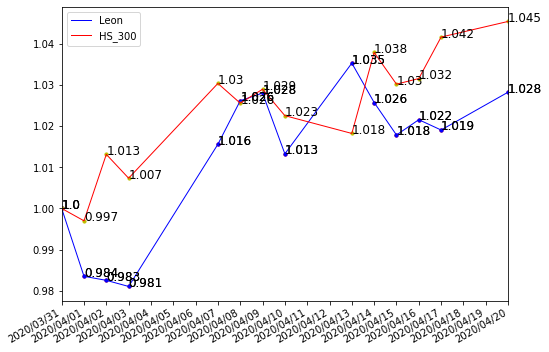

In [107]:


#print(dateList)
#print(dataList)
net_value = []
base_value = dataList[0]
print('base value:',base_value)


for key,item in zip(dateList,dataList):
    #print(key,item)
    net_value.append([key,item[0]/base_value[0],item[1]/base_value[1],item[2]/base_value[2]])
#print("net value")
#for net in net_value:
    #print(net)

create_figure(net_value)

[datetime.date(2020, 3, 31), datetime.date(2020, 4, 1), datetime.date(2020, 4, 2), datetime.date(2020, 4, 3), datetime.date(2020, 4, 7), datetime.date(2020, 4, 8), datetime.date(2020, 4, 9), datetime.date(2020, 4, 10), datetime.date(2020, 4, 13), datetime.date(2020, 4, 14), datetime.date(2020, 4, 15), datetime.date(2020, 4, 16), datetime.date(2020, 4, 17), datetime.date(2020, 4, 20)]


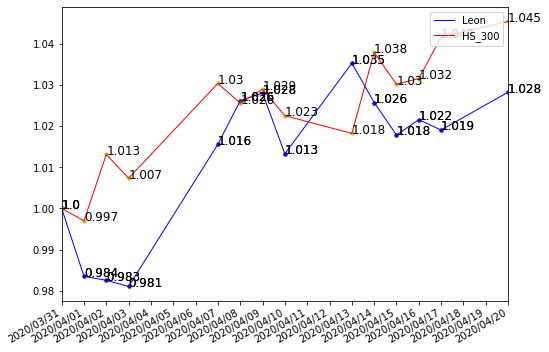

In [98]:
import tushare

In [62]:
print(tushare.__version__)

1.2.54


In [52]:
import tushare as ts

ts.get_hist_data('601607') #一次性获取全部日k线数据

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2020-04-20,19.74,20.07,19.74,19.71,282288.28,0.17,0.87,19.792,19.793,19.394,342508.70,374732.31,380371.94
2020-04-17,20.00,20.10,19.57,19.51,322739.75,-0.35,-1.76,19.874,19.712,19.361,355672.45,373340.24,394947.39
2020-04-16,19.85,20.25,19.92,19.57,368705.16,0.07,0.35,19.910,19.629,19.249,360777.56,367707.01,386544.15
2020-04-15,19.88,20.20,19.85,19.81,344876.91,-0.03,-0.15,19.896,19.525,19.127,362899.63,361009.56,377681.96
2020-04-14,20.01,20.07,19.88,19.54,393933.38,-0.27,-1.34,19.870,19.491,19.026,400430.92,359692.54,372325.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-10-27,26.26,26.50,26.30,26.02,117342.58,0.10,0.38,26.202,26.202,26.202,170643.44,170643.44,170643.44
2017-10-26,26.60,27.09,26.20,26.06,194646.84,-0.36,-1.35,26.178,26.178,26.178,183968.66,183968.66,183968.66
2017-10-25,26.00,26.67,26.56,25.88,173891.56,0.55,2.12,26.170,26.170,26.170,180409.27,180409.27,180409.27
